### Load packages

In [1]:
# load packages
import geopandas as gpd
import pandas as pd
import requests
from zipfile import ZipFile
import io
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rc('figure', figsize=(15, 9)) # default figsizes
# get rid of annoyances
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### Helper function to grab shapefiles online

In [2]:
## function to grab a shapefule -- if the lame census server is working
## url = http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2017_us_county_500k.zip'
def download_extract_zip(url):
    """
    Download a ZIP file and extract its contents in memory
    yields (filename, file-like object) pairs
    """
    response = requests.get(url)
    with zipfile.ZipFile(io.BytesIO(response.content)) as thezip:
        for zipinfo in thezip.infolist():
            with thezip.open(zipinfo) as thefile:
                yield zipinfo.filename, thefile

### Open downloaded zipfile

In [3]:
## assuming you've already downloaded a file and it's in the 'shapfiles/' folder
z = ZipFile('shapefiles/cb_2015_us_county_500k.zip')
## extract
z.extractall(path='shapefiles/') # extract to folder

In [4]:
## check the filenames
z.namelist()

['cb_2015_us_county_500k.shp.ea.iso.xml',
 'cb_2015_us_county_500k.shp.iso.xml',
 'cb_2015_us_county_500k.shp.xml',
 'cb_2015_us_county_500k.shp',
 'cb_2015_us_county_500k.shx',
 'cb_2015_us_county_500k.dbf',
 'cb_2015_us_county_500k.prj',
 'cb_2015_us_county_500k.cpg']

### Make geopandas db

In [5]:
# load all the counties into a gdp database
usa = gpd.read_file("shapefiles/cb_2015_us_county_500k.shp")
print("Shape of the dataframe: {}".format(usa.shape))
print("Projection of dataframe: {}".format(usa.crs))
usa.head() #last 5 records in dataframe

Shape of the dataframe: (3233, 10)
Projection of dataframe: {'init': 'epsg:4269'}


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,01,005,00161528,0500000US01005,01005,Barbour,06,2291820706,50864677,"POLYGON ((-85.74803199999999 31.619181, -85.74..."
1,01,023,00161537,0500000US01023,01023,Choctaw,06,2365954971,19059247,"POLYGON ((-88.47322699999999 31.893856, -88.46..."
2,01,035,00161543,0500000US01035,01035,Conecuh,06,2201896058,6643480,"POLYGON ((-87.42720399999999 31.26436, -87.425..."
3,01,051,00161551,0500000US01051,01051,Elmore,06,1601876535,99850740,"POLYGON ((-86.41333499999999 32.750591, -86.37..."
4,01,065,00161558,0500000US01065,01065,Hale,06,1667804583,32525874,"POLYGON ((-87.870464 32.762442, -87.868184 32...."


In [6]:
usa.geometry.area[0:5                 ]

0    0.223256
1    0.227716
2    0.209552
3    0.163465
4    0.163560
dtype: float64

In [7]:
bounds = usa.bounds
bounds[0:5]

,minx,miny,maxx,maxy
0,-85.748251,31.617747,-85.049310,32.148251
1,-88.473227,31.697952,-87.928250,32.310574
2,-87.427455,31.181133,-86.662082,31.753035
3,-86.413335,32.406146,-85.852640,32.769225
4,-87.870464,32.480783,-87.420560,33.006824


### Take a look

(10, 75)

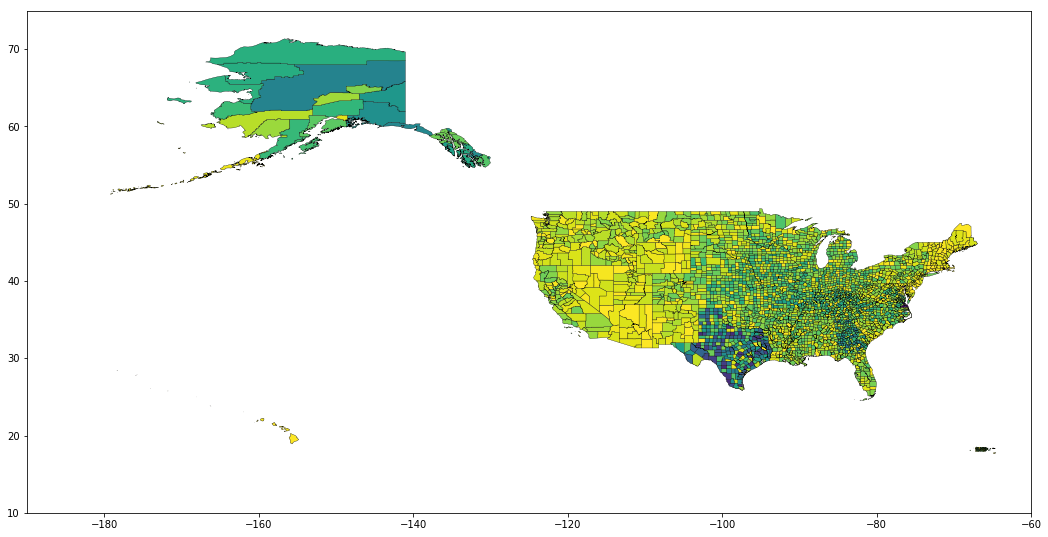

In [8]:
# peek at all
# usa.plot()

fig, ax = plt.subplots(figsize=(18,15), subplot_kw={'aspect':'equal'})
usa.plot(column='COUNTYFP', legend=False, ax=ax, cmap='viridis_r', edgecolor='black', linewidth=0.3)
ax.set_xlim(-190, -60)
ax.set_ylim(10, 75)

### Select one state

In [9]:
# filter for Oregon
ore = usa[usa.STATEFP=='41']

/Users/tjd/anaconda3/lib/python3.5/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


Text(0.5,1,'OR Counties by Land Area')

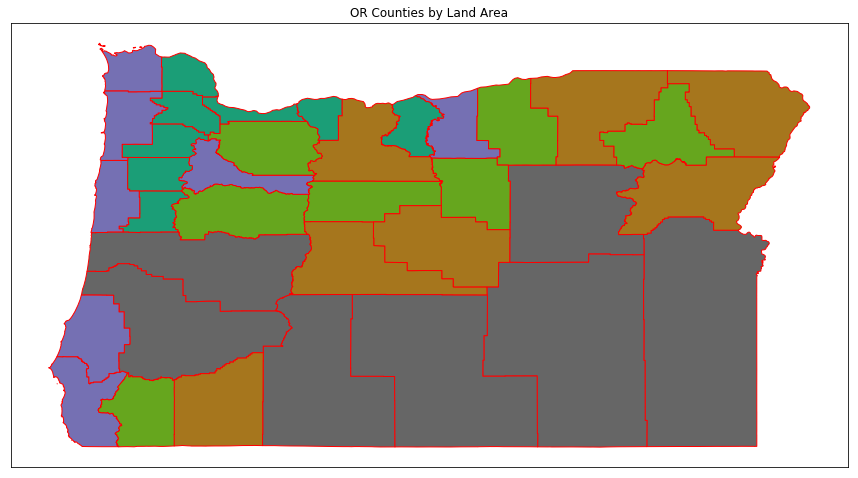

In [10]:
# filters on land area; could merge with other filterable variables
ax = ore.plot(figsize=(15,15), column='ALAND', cmap="Dark2", edgecolor='red', scheme='quantiles', legend=False)
ax.set(xticks=[], yticks=[]) #removes axes
ax.set_title("OR Counties by Land Area", fontsize='large')

# add the legend and specify where
# leg = ax.get_legend()
# leg.set_bbox_to_anchor((0.98,0.15))

# save plot as .png
# plt.savefig("OH_Counties.png", bbox_inches='tight')

### Bring in other geocoded data

In [11]:
ls data/

ACS_17_1YR_S1501.txt*          ACS_17_1YR_S1501_with_ann.csv*
ACS_17_1YR_S1501_metadata.csv* aff_download_readme_ann.txt*


In [12]:
df = pd.read_csv("data/ACS_17_1YR_S1501_with_ann.csv")

In [13]:
df.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC02,HC01_MOE_VC02,HC02_EST_VC02,HC02_MOE_VC02,HC03_EST_VC02,HC03_MOE_VC02,HC04_EST_VC02,...,HC02_EST_VC85,HC02_MOE_VC85,HC03_EST_VC85,HC03_MOE_VC85,HC04_EST_VC85,HC04_MOE_VC85,HC05_EST_VC85,HC05_MOE_VC85,HC06_EST_VC85,HC06_MOE_VC85
0,Id,Id2,Geography,Total; Estimate; Population 18 to 24 years,Total; Margin of Error; Population 18 to 24 years,Percent; Estimate; Population 18 to 24 years,Percent; Margin of Error; Population 18 to 24 ...,Male; Estimate; Population 18 to 24 years,Male; Margin of Error; Population 18 to 24 years,Percent Male; Estimate; Population 18 to 24 years,...,Percent; Estimate; MEDIAN EARNINGS IN THE PAST...,Percent; Margin of Error; MEDIAN EARNINGS IN T...,Male; Estimate; MEDIAN EARNINGS IN THE PAST 12...,Male; Margin of Error; MEDIAN EARNINGS IN THE ...,Percent Male; Estimate; MEDIAN EARNINGS IN THE...,Percent Male; Margin of Error; MEDIAN EARNINGS...,Female; Estimate; MEDIAN EARNINGS IN THE PAST ...,Female; Margin of Error; MEDIAN EARNINGS IN TH...,Percent Female; Estimate; MEDIAN EARNINGS IN T...,Percent Female; Margin of Error; MEDIAN EARNIN...
1,0400000US41,41,Oregon,367807,4165,(X),(X),188153,2722,(X),...,(X),(X),81466,1754,(X),(X),54444,2682,(X),(X)
2,0500000US41003,41003,"Benton County, Oregon",20498,623,(X),(X),10688,433,(X),...,(X),(X),81685,15821,(X),(X),46059,8060,(X),(X)
3,0500000US41005,41005,"Clackamas County, Oregon",31826,1282,(X),(X),16809,1008,(X),...,(X),(X),100290,13508,(X),(X),55986,8552,(X),(X)
4,0500000US41017,41017,"Deschutes County, Oregon",12944,1393,(X),(X),6401,757,(X),...,(X),(X),70350,19341,(X),(X),52523,8224,(X),(X)


### Merge

In [14]:
# the connecting columns have different names
df_new = pd.merge(usa, df, how='inner', left_on=['GEOID'], right_on=['GEO.id2'])

In [15]:
# check result
df_new.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15 entries, 0 to 14
Columns: 781 entries, STATEFP to HC06_MOE_VC85
dtypes: int64(2), object(779)
memory usage: 91.6+ KB


In [16]:
# a couple values are stray (Id2, 41)
df['GEO.id2'].unique()

array(['Id2', '41', '41003', '41005', '41017', '41019', '41029', '41033',
       '41035', '41039', '41043', '41047', '41051', '41053', '41059',
       '41067', '41071'], dtype=object)

In [17]:
# filter those out 
ore2 = df_new[~df_new['GEO.id2'].isin(['Id2', '41'])]

In [18]:
ore2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15 entries, 0 to 14
Columns: 781 entries, STATEFP to HC06_MOE_VC85
dtypes: int64(2), object(779)
memory usage: 91.6+ KB


### Plot it

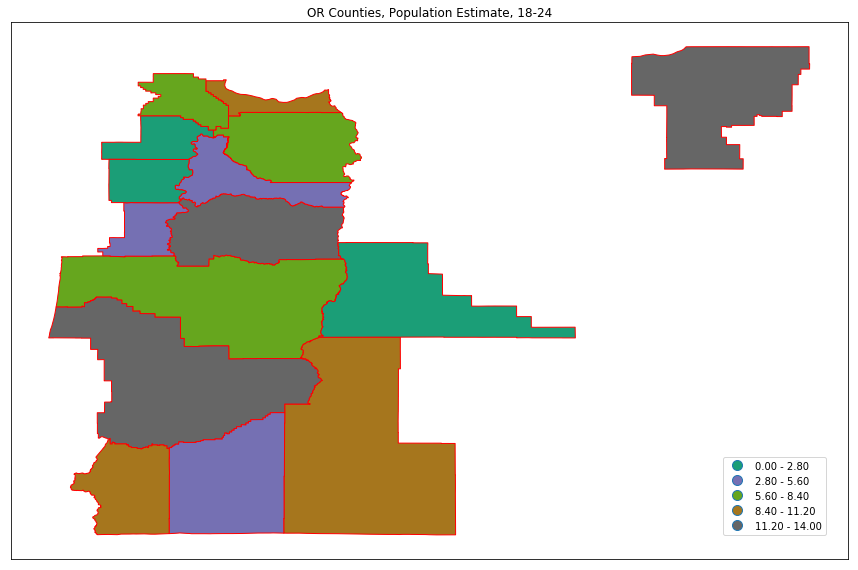

In [19]:
# only 15 counties have data, so need to fix that later
ax2 = ore2.plot(figsize=(15,15), column='HC01_EST_VC02', cmap="Dark2", edgecolor='red', scheme='quantiles', legend=True)
ax2.set(xticks=[], yticks=[]) #removes axes
ax2.set_title("OR Counties, Population Estimate, 18-24", fontsize='large')
leg = ax2.get_legend()
leg.set_bbox_to_anchor((0.98,0.2))
